<a href="https://colab.research.google.com/github/dvstar22/data_analysis/blob/main/fintech_testcase_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install sklearn --upgrade

https://docs.google.com/spreadsheets/d/1Frtx1K6j1X8g1ThGrpnMLLslfmmexeoO/edit?usp=sharing&ouid=101807145143614308444&rtpof=true&sd=true

In [ ]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')

In [ ]:
! gdown --id 1Frtx1K6j1X8g1ThGrpnMLLslfmmexeoO

Downloading...
From: https://drive.google.com/uc?id=1Frtx1K6j1X8g1ThGrpnMLLslfmmexeoO
To: /content/fintech-testcase-default.xlsx
100% 928k/928k [00:00<00:00, 57.0MB/s]


Во вложении, файл, нужно сделать следующее

-сделать модель, предсказывающую вероятность дефолта (таргет fpd5_flg), 
в качестве предикторов можно использовать все что есть в файле 
(не обязательно абсолютно все), кроме dt (это дата выдачи кредита). 
Можно делать в чем угодно. Преобразовывать переменные можно как угодно. 
В качестве инструмента можно выбрать обычную логистическую регрессию.  

-на выходе должен быть тот же самый файл, но напротив каждого наблюдения 
должна быть проставлена вероятность дефолта по построенной модели  

-нужно сделать мини-отчет по модели в Excel или Word (или Jupiter Notebook), 
показать Gini (AuROC) модели, распределение (гистограмму) по предсказанной 
вероятности дефолта и описать кратко что было сделано и как  

Оцениваться будет не финальный результат в плане Gini (или других метрик), 
а скорее ход мыслей и порядок действий.  

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/fintech-testcase-default.xlsx')

In [ ]:
df.head()

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0


# EDA

In [ ]:
df['fpd5_flg'].mean()

0.2727982815856278

In [ ]:
df.isna().mean()

fpd5_flg                  0.000000
dt                        0.000000
gender                    0.000000
device_quaility_index     0.036777
behavioral_index          0.036777
type_of_document          0.000000
age                       0.000000
email_domain_formatted    0.000000
social_status             0.000000
salary                    0.046475
disbursment_type          0.000000
os                        0.001041
email_index               0.002148
dtype: float64

In [ ]:
df['dt'] = pd.to_datetime(df['dt'],format='%Y-%m-%d')

In [ ]:
df['dt'].agg(['min','max'])

min   2020-12-09
max   2021-02-03
Name: dt, dtype: datetime64[ns]

In [ ]:
len(df)

15363

In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0


In [ ]:
df.groupby('os')['fpd5_flg'].agg(['count','mean'])

,count,mean
os,,
Android,11499,0.284460
Chrome OS,5,0.600000
Linux,7,0.571429
OS X,4,0.500000
Windows,845,0.261538
iOS,2947,0.230743
macOS,40,0.150000


In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0


In [ ]:
t = df.groupby('email_domain_formatted')['fpd5_flg'].agg(['count','mean'])

In [ ]:
t.sort_values('count',ascending=False).head(10)

,count,mean
email_domain_formatted,,
GMAIL.COM,12109,0.286564
YAHOO.COM,2626,0.228104
YAHOO.COM.PH,182,0.153846
DEPED.GOV.PH,100,0.230000
ICLOUD.COM,88,0.238636
YMAIL.COM,67,0.223881
ROCKETMAIL.COM,37,0.216216
HOTMAIL.COM,22,0.136364
OUTLOOK.COM,19,0.210526


In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0


In [ ]:
df.groupby('behavioral_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
behavioral_index,,
1.0,23,0.043478
2.0,202,0.198020
3.0,4675,0.265027
4.0,4721,0.260538
5.0,4447,0.287385
6.0,730,0.324658
NaN,565,0.293805


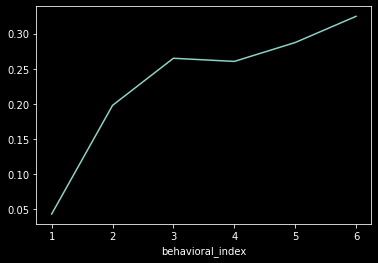

In [ ]:
df.groupby('behavioral_index',dropna=False)['fpd5_flg'].mean().plot()

In [ ]:
df.groupby('device_quaility_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
device_quaility_index,,
0.0,1122,0.330660
1.0,2374,0.291070
2.0,2337,0.307659
3.0,7837,0.257496
4.0,1128,0.200355
NaN,565,0.293805


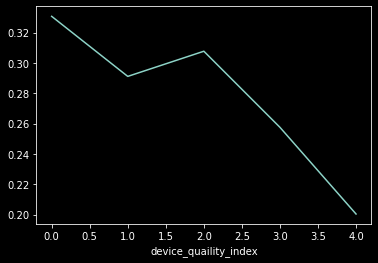

In [ ]:
df.groupby('device_quaility_index',dropna=False)['fpd5_flg'].mean().plot()

In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0


In [ ]:
df.groupby('type_of_document',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
type_of_document,,
Driver license ID,3073,0.277904
PRC,449,0.187082
Passport,1867,0.274772
SSS,1498,0.242991
TIN,3057,0.307164
UMID,5419,0.265178


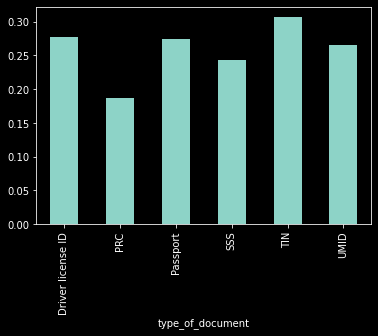

In [ ]:
df.groupby('type_of_document',dropna=False)['fpd5_flg'].mean().plot(kind='bar')

In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0


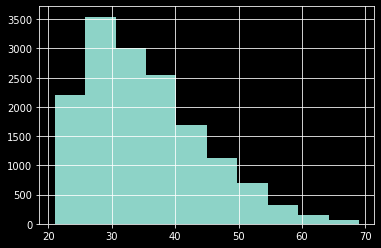

In [ ]:
df['age'].hist()

In [ ]:
df['age_bin'] = pd.qcut(df['age'],5)

In [ ]:
df.groupby('age_bin',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
age_bin,,
"(20.999, 27.0]",3635,0.298212
"(27.0, 31.0]",2766,0.287419
"(31.0, 36.0]",2887,0.283685
"(36.0, 43.0]",3381,0.262053
"(43.0, 69.0]",2694,0.225316


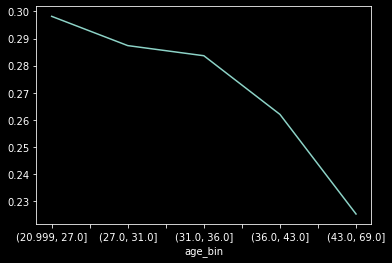

In [ ]:
df.groupby('age_bin',dropna=False)['fpd5_flg'].mean().plot()

In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index,age_bin
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0,"(20.999, 27.0]"
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0,"(31.0, 36.0]"
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0,"(36.0, 43.0]"
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0,"(27.0, 31.0]"
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0,"(27.0, 31.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0,"(31.0, 36.0]"
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0,"(31.0, 36.0]"
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0,"(27.0, 31.0]"
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0,"(36.0, 43.0]"


In [ ]:
t = df.groupby('social_status',dropna=False)['fpd5_flg'].agg(['count','mean'])

In [ ]:
t

,count,mean
social_status,,
BPO Professionals,2295,0.272767
Business Owner,1680,0.284524
Financial Services,247,0.182186
Freelance,777,0.280566
Government Employee,1061,0.258247
Other,1703,0.276571
Private Company Employee,3500,0.264286
"Professional Worker (Doctors, Engineers, Accountants, etc.)",642,0.194704
Retail Worker,402,0.298507


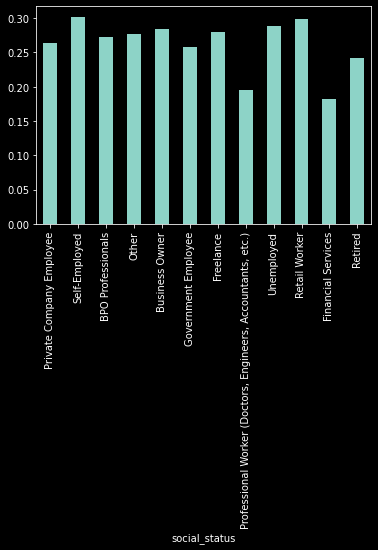

In [ ]:
t.sort_values('count',ascending=False)['mean'].plot(kind='bar')

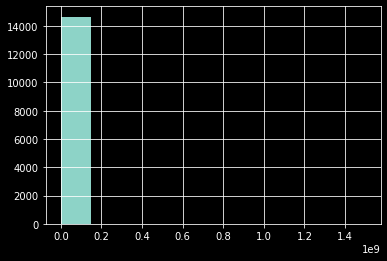

In [ ]:
df['salary'].hist()

In [ ]:
df['salary_bin'] = pd.qcut(df['salary'],5)

In [ ]:
df.groupby('salary_bin',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
salary_bin,,
"(-0.001, 14000.0]",3026,0.298083
"(14000.0, 18000.0]",3036,0.291173
"(18000.0, 22000.0]",2820,0.275532
"(22000.0, 30000.0]",3906,0.273682
"(30000.0, 1500020000.0]",1861,0.193982


In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index,age_bin,salary_bin
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0,"(20.999, 27.0]","(18000.0, 22000.0]"
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0,"(31.0, 36.0]","(14000.0, 18000.0]"
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0,"(36.0, 43.0]","(-0.001, 14000.0]"
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0,"(27.0, 31.0]","(30000.0, 1500020000.0]"
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0,"(27.0, 31.0]","(22000.0, 30000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0,"(31.0, 36.0]","(22000.0, 30000.0]"
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0,"(31.0, 36.0]","(22000.0, 30000.0]"
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0,"(27.0, 31.0]","(22000.0, 30000.0]"
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0,"(36.0, 43.0]","(22000.0, 30000.0]"


In [ ]:
df.groupby('disbursment_type',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
disbursment_type,,
Bank,8918,0.216192
E-wallet,6445,0.351125


In [ ]:
t = df.groupby('email_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

In [ ]:
t.sort_values('count',ascending=False)

,count,mean
email_index,,
1.0,8926,0.281201
0.0,4253,0.236539
8.0,1329,0.314522
6.0,273,0.296703
4.0,232,0.331897
10.0,176,0.318182
2.0,129,0.217054
NaN,33,0.303030
3.0,7,0.285714


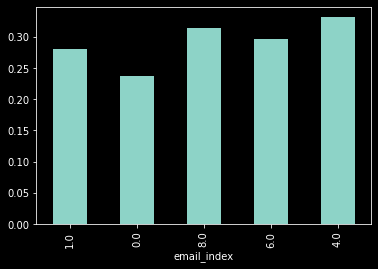

In [ ]:
t.sort_values('count',ascending=False)['mean'].head(5).plot(kind='bar')

In [ ]:
df.groupby('gender',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
gender,,
0,5698,0.307125
1,9665,0.252561


https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7#:~:text=Phik%20(%F0%9D%9C%99k)%20is%20a%20new,a%20bivariate%20normal%20input%20distribution.

# Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['fpd5_flg', 'dt', 'gender', 'device_quaility_index', 'behavioral_index',
       'type_of_document', 'age', 'email_domain_formatted', 'social_status',
       'salary', 'disbursment_type', 'os', 'email_index', 'age_bin',
       'salary_bin'],
      dtype='object')

In [ ]:
X = ['gender', 'device_quaility_index', 'behavioral_index',
       'type_of_document', 'age', 'email_domain_formatted', 'social_status',
       'salary', 'disbursment_type', 'os', 'email_index']

y = ['fpd5_flg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[X],
                                                    df[y],
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
X_train

,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
3132,0,1.0,5.0,UMID,24,GMAIL.COM,Other,20000.0,E-wallet,Android,0.0
7655,1,2.0,5.0,Passport,35,YAHOO.COM,Other,15000.0,E-wallet,Android,0.0
3520,1,3.0,4.0,Passport,37,ICLOUD.COM,Other,25000.0,E-wallet,iOS,8.0
14251,1,3.0,5.0,UMID,26,GMAIL.COM,"Professional Worker (Doctors, Engineers, Accou...",16000.0,Bank,iOS,1.0
2588,0,3.0,6.0,Driver license ID,50,GMAIL.COM,Business Owner,40000.0,E-wallet,Android,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5191,0,NaN,NaN,TIN,24,GMAIL.COM,Private Company Employee,24000.0,E-wallet,Android,1.0
13418,1,2.0,4.0,UMID,26,YAHOO.COM,BPO Professionals,24000.0,Bank,macOS,1.0
5390,0,3.0,4.0,Driver license ID,24,GMAIL.COM,Self-Employed,18000.0,E-wallet,Android,8.0
860,1,0.0,3.0,UMID,28,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,1.0


In [ ]:
y_train

,fpd5_flg
3132,1
7655,0
3520,0
14251,0
2588,0
...,...
5191,0
13418,0
5390,0
860,0


In [ ]:
features_num = X_train.select_dtypes(include='number').copy()

In [ ]:
X_train

,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
3132,0,1.0,5.0,UMID,24,GMAIL.COM,Other,20000.0,E-wallet,Android,0.0
7655,1,2.0,5.0,Passport,35,YAHOO.COM,Other,15000.0,E-wallet,Android,0.0
3520,1,3.0,4.0,Passport,37,ICLOUD.COM,Other,25000.0,E-wallet,iOS,8.0
14251,1,3.0,5.0,UMID,26,GMAIL.COM,"Professional Worker (Doctors, Engineers, Accou...",16000.0,Bank,iOS,1.0
2588,0,3.0,6.0,Driver license ID,50,GMAIL.COM,Business Owner,40000.0,E-wallet,Android,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5191,0,NaN,NaN,TIN,24,GMAIL.COM,Private Company Employee,24000.0,E-wallet,Android,1.0
13418,1,2.0,4.0,UMID,26,YAHOO.COM,BPO Professionals,24000.0,Bank,macOS,1.0
5390,0,3.0,4.0,Driver license ID,24,GMAIL.COM,Self-Employed,18000.0,E-wallet,Android,8.0
860,1,0.0,3.0,UMID,28,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,1.0


In [ ]:
features_num

,gender,device_quaility_index,behavioral_index,age,salary,email_index
3132,0,1.0,5.0,24,20000.0,0.0
7655,1,2.0,5.0,35,15000.0,0.0
3520,1,3.0,4.0,37,25000.0,8.0
14251,1,3.0,5.0,26,16000.0,1.0
2588,0,3.0,6.0,50,40000.0,1.0
...,...,...,...,...,...,...
5191,0,NaN,NaN,24,24000.0,1.0
13418,1,2.0,4.0,26,24000.0,1.0
5390,0,3.0,4.0,24,18000.0,8.0
860,1,0.0,3.0,28,25000.0,1.0


In [ ]:
features_cat = X_train.select_dtypes(include='object').copy()

In [ ]:
features_cat

,type_of_document,email_domain_formatted,social_status,disbursment_type,os
3132,UMID,GMAIL.COM,Other,E-wallet,Android
7655,Passport,YAHOO.COM,Other,E-wallet,Android
3520,Passport,ICLOUD.COM,Other,E-wallet,iOS
14251,UMID,GMAIL.COM,"Professional Worker (Doctors, Engineers, Accou...",Bank,iOS
2588,Driver license ID,GMAIL.COM,Business Owner,E-wallet,Android
...,...,...,...,...,...
5191,TIN,GMAIL.COM,Private Company Employee,E-wallet,Android
13418,UMID,YAHOO.COM,BPO Professionals,Bank,macOS
5390,Driver license ID,GMAIL.COM,Self-Employed,E-wallet,Android
860,UMID,GMAIL.COM,BPO Professionals,Bank,Android


In [ ]:
features_num.isna().mean()

gender                   0.000000
device_quaility_index    0.036545
behavioral_index         0.036545
age                      0.000000
salary                   0.045285
email_index              0.002232
dtype: float64

In [ ]:
features_num.columns

Index(['gender', 'device_quaility_index', 'behavioral_index', 'age', 'salary',
       'email_index'],
      dtype='object')

## Imputer

In [ ]:
most_freq_num_features = ['gender', 'device_quaility_index', 
                  'behavioral_index', 'email_index']

In [ ]:
median_num_features = ['age', 'salary']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
median_num_pipe = Pipeline([
          ('imputer', SimpleImputer(strategy="median"))])

In [ ]:
most_freq_pipe = Pipeline([
          ('imputer', SimpleImputer(strategy="most_frequent"))])

In [ ]:
fillna_pipe = ColumnTransformer([
        ("most_freq", most_freq_pipe, most_freq_num_features),
        ("median", median_num_pipe, median_num_features),
    ])

In [ ]:
fillna_pipe.fit_transform(X_train)

array([[0.0e+00, 1.0e+00, 5.0e+00, 0.0e+00, 2.4e+01, 2.0e+04],
       [1.0e+00, 2.0e+00, 5.0e+00, 0.0e+00, 3.5e+01, 1.5e+04],
       [1.0e+00, 3.0e+00, 4.0e+00, 8.0e+00, 3.7e+01, 2.5e+04],
       ...,
       [0.0e+00, 3.0e+00, 4.0e+00, 8.0e+00, 2.4e+01, 1.8e+04],
       [1.0e+00, 0.0e+00, 3.0e+00, 1.0e+00, 2.8e+01, 2.5e+04],
       [1.0e+00, 3.0e+00, 3.0e+00, 1.0e+00, 3.8e+01, 3.0e+03]])

In [ ]:
t = pd.DataFrame(fillna_pipe.fit_transform(X_train),columns=most_freq_num_features+median_num_features)

In [ ]:
t = t.set_index(X_train.index)

In [ ]:
t.isna().mean()

gender                   0.0
device_quaility_index    0.0
behavioral_index         0.0
email_index              0.0
age                      0.0
salary                   0.0
dtype: float64

In [ ]:
t

,gender,device_quaility_index,behavioral_index,email_index,age,salary
3132,0.0,1.0,5.0,0.0,24.0,20000.0
7655,1.0,2.0,5.0,0.0,35.0,15000.0
3520,1.0,3.0,4.0,8.0,37.0,25000.0
14251,1.0,3.0,5.0,1.0,26.0,16000.0
2588,0.0,3.0,6.0,1.0,50.0,40000.0
...,...,...,...,...,...,...
5191,0.0,3.0,3.0,1.0,24.0,24000.0
13418,1.0,2.0,4.0,1.0,26.0,24000.0
5390,0.0,3.0,4.0,8.0,24.0,18000.0
860,1.0,0.0,3.0,1.0,28.0,25000.0


In [ ]:
X_train['salary'].median()

20000.0

In [ ]:
t[t.index.isin(X_train[X_train['salary'].isna()].index)]

,gender,device_quaility_index,behavioral_index,email_index,age,salary
7412,0.0,3.0,3.0,1.0,31.0,20000.0
8816,1.0,2.0,3.0,0.0,46.0,20000.0
5152,1.0,3.0,4.0,0.0,23.0,20000.0
14282,1.0,3.0,4.0,1.0,28.0,20000.0
11357,1.0,3.0,3.0,6.0,25.0,20000.0
...,...,...,...,...,...,...
2693,0.0,3.0,3.0,1.0,33.0,20000.0
13471,1.0,4.0,3.0,0.0,22.0,20000.0
8529,1.0,2.0,6.0,1.0,29.0,20000.0
8226,1.0,3.0,6.0,1.0,35.0,20000.0


In [ ]:
X_train.isna().mean()

gender                    0.000000
device_quaility_index     0.036545
behavioral_index          0.036545
type_of_document          0.000000
age                       0.000000
email_domain_formatted    0.000000
social_status             0.000000
salary                    0.045285
disbursment_type          0.000000
os                        0.001116
email_index               0.002232
dtype: float64

In [ ]:
X_train['device_quaility_index'].median()

3.0

In [ ]:
t[t.index.isin(X_train[X_train['device_quaility_index'].isna()].index)]

,gender,device_quaility_index,behavioral_index,email_index,age,salary
8885,1.0,3.0,3.0,10.0,31.0,7000.0
2666,1.0,3.0,3.0,0.0,33.0,15000.0
12092,0.0,3.0,3.0,1.0,34.0,21000.0
1896,0.0,3.0,3.0,1.0,24.0,20000.0
9002,1.0,3.0,3.0,1.0,36.0,15500.0
...,...,...,...,...,...,...
7916,1.0,3.0,3.0,1.0,24.0,9000.0
6863,0.0,3.0,3.0,1.0,37.0,15100.0
10233,1.0,3.0,3.0,1.0,28.0,1000.0
3005,1.0,3.0,3.0,1.0,48.0,20000.0


## Feature adder

In [ ]:
df['salary_over_age'] = df['salary'] / df['age']

In [ ]:
df['salary_over_age_bins'] = pd.qcut(df['salary_over_age'],5)

In [ ]:
df.groupby('salary_over_age_bins')['fpd5_flg'].agg(['count','mean'])

,count,mean
salary_over_age_bins,,
"(-0.001, 370.37]",2974,0.296234
"(370.37, 526.316]",2889,0.269297
"(526.316, 681.818]",2990,0.276923
"(681.818, 909.091]",2981,0.270044
"(909.091, 36585853.659]",2815,0.249023


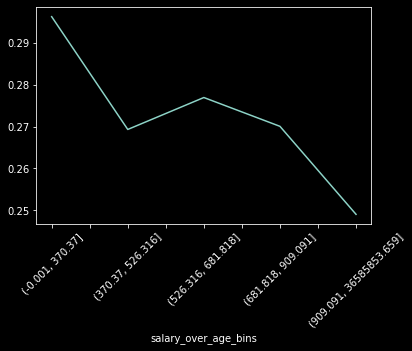

In [ ]:
df.groupby('salary_over_age_bins')['fpd5_flg'].mean().plot(rot=45)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
age_ix, salary_ix = 4, 5

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        salary_over_age = X[:, 5] / X[:, 4]


        return np.c_[X, salary_over_age]

## todo atribute adder with target encoding

In [ ]:
attr_adder = CombinedAttributesAdder()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipeline = Pipeline([
        ('imputer', fillna_pipe),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
num_pipeline.fit_transform(X_train)

array([[-1.29632505, -1.30853215,  1.04638693, ..., -1.22414823,
        -0.00990637, -0.00928491],
       [ 0.77141146, -0.3701516 ,  1.04638693, ..., -0.01522725,
        -0.01025206, -0.01043227],
       [ 0.77141146,  0.56822895, -0.01270437, ...,  0.20457657,
        -0.00956068, -0.00973181],
       ...,
       [-1.29632505,  0.56822895, -0.01270437, ..., -1.22414823,
        -0.01004464, -0.00952113],
       [ 0.77141146, -2.24691271, -1.07179567, ..., -0.7845406 ,
        -0.00956068, -0.00911618],
       [ 0.77141146,  0.56822895, -1.07179567, ...,  0.31447847,
        -0.01108171, -0.01142333]])

In [ ]:
t = pd.DataFrame(num_pipeline.fit_transform(X_train),
                 columns=most_freq_num_features+median_num_features + ['salary_over_age'])

In [ ]:
t

,gender,device_quaility_index,behavioral_index,email_index,age,salary,salary_over_age
0,-1.296325,-1.308532,1.046387,-0.658811,-1.224148,-0.009906,-0.009285
1,0.771411,-0.370152,1.046387,-0.658811,-0.015227,-0.010252,-0.010432
2,0.771411,0.568229,-0.012704,2.686848,0.204577,-0.009561,-0.009732
3,0.771411,0.568229,1.046387,-0.240603,-1.004344,-0.010183,-0.009903
4,-1.296325,0.568229,2.105478,-0.240603,1.633301,-0.008524,-0.009379
...,...,...,...,...,...,...,...
10749,-1.296325,0.568229,-1.071796,-0.240603,-1.224148,-0.009630,-0.008812
10750,0.771411,-0.370152,-0.012704,-0.240603,-1.004344,-0.009630,-0.009031
10751,-1.296325,0.568229,-0.012704,2.686848,-1.224148,-0.010045,-0.009521
10752,0.771411,-2.246913,-1.071796,-0.240603,-0.784541,-0.009561,-0.009116


In [ ]:
t = pd.DataFrame({'A':[1,0],'B':[0,1]})

In [ ]:
t

,A,B
0,1,0
1,0,1


In [ ]:
t.corr()

,A,B
A,1.0,-1.0
B,-1.0,1.0


# Categorical pipe

In [ ]:
num_attribs = list(features_num.columns)

In [ ]:
cat_attribs = list(features_cat.columns)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", ohe, cat_attribs),
    ])

In [ ]:
t = pd.DataFrame(full_pipeline.fit_transform(X_train).toarray())

In [ ]:
cat_features_names = list(full_pipeline.transformers_[1][1].get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
t.columns = most_freq_num_features+median_num_features + ['salary_over_age'] + cat_features_names

In [ ]:
features_cat.isna().mean()

type_of_document          0.000000
email_domain_formatted    0.000000
social_status             0.000000
disbursment_type          0.000000
os                        0.001116
dtype: float64

In [ ]:
t

,gender,device_quaility_index,behavioral_index,email_index,age,salary,salary_over_age,x0_Driver license ID,x0_PRC,x0_Passport,x0_SSS,x0_TIN,x0_UMID,x1_ABS-CBN.COM,x1_ABSOLUTELYCANDO.COM,x1_AMSAMOA.EDU,x1_AOL.COM,x1_BOLTONINTERNATIONAL.COM,x1_BULSU.EDU.PH,x1_BURGANDRILLING.COM,x1_CAREMIN.COM,x1_CIIF.PH,x1_CPSCTECH.ORG,x1_DAVIESPAINTS.COM.PH,x1_DEPED.GOV.PH,x1_DEPEDQC.PH,x1_DEXCOM.COM,x1_DLSU.EDU.PH,x1_EMAIL.COM,x1_EMAIL.COM.PH,x1_EMAIL.PH,x1_EXELCIUSPH.COM,x1_FRONTIER.COM,x1_GLOBE.COM.PH,x1_GLOBEPARTNERS.COM.PH,x1_GMA.COM,x1_GMAIL.COM,x1_GMX.COM,x1_GSIS.GOV.PH,x1_HARADA.COM.PH,...,x1_REDRIBBONBAKESHOP.COM.PH,x1_RGOC.COM.PH,x1_ROCKETMAIL.COM,x1_SECDEP.ORG,x1_SFXC.EDU.PH,x1_TELUS.COM,x1_UPHSL.EDU.PH,x1_USA.COM,x1_UZ.EDU.PH,x1_WGROUP.COM.PH,x1_WHITESHIELD.PH,x1_YAHOO.CO.NZ,x1_YAHOO.CO.UK,x1_YAHOO.COM,x1_YAHOO.COM.PH,x1_YAHOO.COM.SG,x1_YANDEX.COM,x1_YMAIL.COM,x2_BPO Professionals,x2_Business Owner,x2_Financial Services,x2_Freelance,x2_Government Employee,x2_Other,x2_Private Company Employee,"x2_Professional Worker (Doctors, Engineers, Accountants, etc.)",x2_Retail Worker,x2_Retired,x2_Self-Employed,x2_Unemployed,x3_Bank,x3_E-wallet,x4_Android,x4_Chrome OS,x4_Linux,x4_OS X,x4_Windows,x4_iOS,x4_macOS,x4_nan
0,-1.296325,-1.308532,1.046387,-0.658811,-1.224148,-0.009906,-0.009285,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.771411,-0.370152,1.046387,-0.658811,-0.015227,-0.010252,-0.010432,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.771411,0.568229,-0.012704,2.686848,0.204577,-0.009561,-0.009732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.771411,0.568229,1.046387,-0.240603,-1.004344,-0.010183,-0.009903,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.296325,0.568229,2.105478,-0.240603,1.633301,-0.008524,-0.009379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,-1.296325,0.568229,-1.071796,-0.240603,-1.224148,-0.009630,-0.008812,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,0.771411,-0.370152,-0.012704,-0.240603,-1.004344,-0.009630,-0.009031,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
full_pipeline.transform(X_test)

<4609x105 sparse matrix of type '<class 'numpy.float64'>'
	with 55283 stored elements in Compressed Sparse Row format>

# Full Pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
most_freq_num_features = ['gender', 'device_quaility_index', 
                  'behavioral_index', 'email_index']

In [ ]:
median_num_features = ['age', 'salary']

In [ ]:
median_num_pipe = Pipeline([
          ('imputer', SimpleImputer(strategy="median"))])

In [ ]:
most_freq_pipe = Pipeline([
          ('imputer', SimpleImputer(strategy="most_frequent"))])

In [ ]:
fillna_pipe = ColumnTransformer([
        ("most_freq", most_freq_pipe, most_freq_num_features),
        ("median", median_num_pipe, median_num_features),
    ])

In [ ]:
# column index
age_ix, salary_ix = 4, 5

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        salary_over_age = X[:, 5] / X[:, 4]


        return np.c_[X, salary_over_age]

## todo atribute adder with target encoding

In [ ]:
attr_adder = CombinedAttributesAdder()

In [ ]:
num_pipeline = Pipeline([
        ('imputer', fillna_pipe),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
num_attribs = ['gender',
 'device_quaility_index',
 'behavioral_index',
 'age',
 'salary',
 'email_index']

In [ ]:
cat_attribs = ['type_of_document',
 'email_domain_formatted',
 'social_status',
 'disbursment_type',
 'os']

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

In [ ]:
t = pd.DataFrame(full_pipeline.fit_transform(X_train).toarray())

In [ ]:
cat_features_names = list(full_pipeline.transformers_[1][1].get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
t.columns = most_freq_num_features+median_num_features + \
            ['salary_over_age'] + cat_features_names

In [ ]:
t

,gender,device_quaility_index,behavioral_index,email_index,age,salary,salary_over_age,x0_Driver license ID,x0_PRC,x0_Passport,x0_SSS,x0_TIN,x0_UMID,x1_ABS-CBN.COM,x1_ABSOLUTELYCANDO.COM,x1_AMSAMOA.EDU,x1_AOL.COM,x1_BOLTONINTERNATIONAL.COM,x1_BULSU.EDU.PH,x1_BURGANDRILLING.COM,x1_CAREMIN.COM,x1_CIIF.PH,x1_CPSCTECH.ORG,x1_DAVIESPAINTS.COM.PH,x1_DEPED.GOV.PH,x1_DEPEDQC.PH,x1_DEXCOM.COM,x1_DLSU.EDU.PH,x1_EMAIL.COM,x1_EMAIL.COM.PH,x1_EMAIL.PH,x1_EXELCIUSPH.COM,x1_FRONTIER.COM,x1_GLOBE.COM.PH,x1_GLOBEPARTNERS.COM.PH,x1_GMA.COM,x1_GMAIL.COM,x1_GMX.COM,x1_GSIS.GOV.PH,x1_HARADA.COM.PH,...,x1_REDRIBBONBAKESHOP.COM.PH,x1_RGOC.COM.PH,x1_ROCKETMAIL.COM,x1_SECDEP.ORG,x1_SFXC.EDU.PH,x1_TELUS.COM,x1_UPHSL.EDU.PH,x1_USA.COM,x1_UZ.EDU.PH,x1_WGROUP.COM.PH,x1_WHITESHIELD.PH,x1_YAHOO.CO.NZ,x1_YAHOO.CO.UK,x1_YAHOO.COM,x1_YAHOO.COM.PH,x1_YAHOO.COM.SG,x1_YANDEX.COM,x1_YMAIL.COM,x2_BPO Professionals,x2_Business Owner,x2_Financial Services,x2_Freelance,x2_Government Employee,x2_Other,x2_Private Company Employee,"x2_Professional Worker (Doctors, Engineers, Accountants, etc.)",x2_Retail Worker,x2_Retired,x2_Self-Employed,x2_Unemployed,x3_Bank,x3_E-wallet,x4_Android,x4_Chrome OS,x4_Linux,x4_OS X,x4_Windows,x4_iOS,x4_macOS,x4_nan
0,-1.296325,-1.308532,1.046387,-0.658811,-1.224148,-0.009906,-0.009285,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.771411,-0.370152,1.046387,-0.658811,-0.015227,-0.010252,-0.010432,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.771411,0.568229,-0.012704,2.686848,0.204577,-0.009561,-0.009732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.771411,0.568229,1.046387,-0.240603,-1.004344,-0.010183,-0.009903,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.296325,0.568229,2.105478,-0.240603,1.633301,-0.008524,-0.009379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,-1.296325,0.568229,-1.071796,-0.240603,-1.224148,-0.009630,-0.008812,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,0.771411,-0.370152,-0.012704,-0.240603,-1.004344,-0.009630,-0.009031,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train_prep = pd.DataFrame(full_pipeline.fit_transform(X_train).toarray())

In [ ]:
cat_features_names = list(full_pipeline.transformers_[1][1].get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_prep.columns = most_freq_num_features+median_num_features + \
            ['salary_over_age'] + cat_features_names

In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
X_train_prep.shape

(10754, 105)

In [ ]:
scores = cross_val_score(log_reg, X_train_prep, y_train,
                         scoring='roc_auc', cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
scores

array([0.60589449, 0.62983921, 0.6418124 , 0.62814546, 0.61768871])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
scores = cross_val_score(gb, X_train_prep, y_train['fpd5_flg'].values,
                         scoring='roc_auc', cv=5)

In [ ]:
scores

array([0.60240364, 0.6351579 , 0.62367669, 0.63363103, 0.62115382])

In [ ]:
! pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


# Catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_attribs

['type_of_document',
 'email_domain_formatted',
 'social_status',
 'disbursment_type',
 'os']

In [ ]:
X_train_nona = X_train.dropna().copy()

In [ ]:
y_train_nona = y_train[y_train.index.isin(X_train_nona.index)].copy()

In [ ]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train_nona,
                                                    y_train_nona,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': cat_attribs,
          'verbose': 200,
          'random_seed': 42,
          'early_stopping_rounds': 200,
          "auto_class_weights":"Balanced"
         }

In [ ]:
cb = CatBoostClassifier(**params)

In [ ]:
cb.fit(X_train_,y_train_,eval_set=(X_val,y_val))

Learning rate set to 0.05107
0:	test: 0.6216208	best: 0.6216208 (0)	total: 63.4ms	remaining: 1m 3s
200:	test: 0.6281188	best: 0.6290820 (21)	total: 2.48s	remaining: 9.84s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6290820427
bestIteration = 21

Shrink model to first 22 iterations.


# OHE drop first

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop='first'), cat_attribs),
    ])

In [ ]:
X_train_prep = pd.DataFrame(full_pipeline.fit_transform(X_train).toarray())

In [ ]:
cat_features_names = list(full_pipeline.transformers_[1][1].get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_prep.columns = most_freq_num_features+median_num_features + \
            ['salary_over_age'] + cat_features_names

In [ ]:
X_train_prep.shape

(10754, 100)

In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
scores = cross_val_score(log_reg, X_train_prep, y_train['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5)

In [ ]:
scores

array([0.5050447 , 0.50129679, 0.50280234, 0.50975273, 0.4985337 ])

In [ ]:
cb = CatBoostClassifier(iterations=500,auto_class_weights="Balanced",verbose=0)

In [ ]:
scores = cross_val_score(cb, X_train_prep, y_train['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5,n_jobs=-1)

In [ ]:
scores

array([0.57719815, 0.59819727, 0.5727554 , 0.57915286, 0.58781535])

## Pipeline debug

In [ ]:
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed': 42,
          'early_stopping_rounds': 200
         }

In [ ]:
cb = CatBoostClassifier(**params)

In [ ]:
cb.fit(X_train_[num_attribs],y_train_,eval_set=(X_val[num_attribs],y_val))

Learning rate set to 0.05107
0:	test: 0.5228330	best: 0.5228330 (0)	total: 2.7ms	remaining: 2.69s
200:	test: 0.5723855	best: 0.5767300 (69)	total: 649ms	remaining: 2.58s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.5767300184
bestIteration = 69

Shrink model to first 70 iterations.


In [ ]:
X_train_num_trans = num_pipeline.fit_transform(X_train)

In [ ]:
log_reg = LogisticRegression(class_weight='balanced')

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
scores = cross_val_score(log_reg, X_train_num_trans, y_train['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5)

In [ ]:
scores

array([0.55519697, 0.5569162 , 0.54199085, 0.57494525, 0.55923827])

In [ ]:
y_train['fpd5_flg'].values.mean()

0.2717128510321741

# Manual prepocessing check

In [ ]:
X_train

,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
3132,0,1.0,5.0,UMID,24,GMAIL.COM,Other,20000.0,E-wallet,Android,0.0
7655,1,2.0,5.0,Passport,35,YAHOO.COM,Other,15000.0,E-wallet,Android,0.0
3520,1,3.0,4.0,Passport,37,ICLOUD.COM,Other,25000.0,E-wallet,iOS,8.0
14251,1,3.0,5.0,UMID,26,GMAIL.COM,"Professional Worker (Doctors, Engineers, Accou...",16000.0,Bank,iOS,1.0
2588,0,3.0,6.0,Driver license ID,50,GMAIL.COM,Business Owner,40000.0,E-wallet,Android,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5191,0,NaN,NaN,TIN,24,GMAIL.COM,Private Company Employee,24000.0,E-wallet,Android,1.0
13418,1,2.0,4.0,UMID,26,YAHOO.COM,BPO Professionals,24000.0,Bank,macOS,1.0
5390,0,3.0,4.0,Driver license ID,24,GMAIL.COM,Self-Employed,18000.0,E-wallet,Android,8.0
860,1,0.0,3.0,UMID,28,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,1.0


In [ ]:
ohe = OneHotEncoder(drop='first')

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_num_manual = pd.DataFrame(scaler.fit_transform(X_train_nona[num_attribs]))

In [ ]:
X_train_num_manual

,0,1,2,3,4,5
0,-1.286261,-1.292496,1.008107,-1.234379,-0.010344,-0.655161
1,0.777447,-0.359242,1.008107,-0.009494,-0.010675,-0.655161
2,0.777447,0.574012,-0.054169,0.213213,-0.010013,2.744145
3,0.777447,0.574012,1.008107,-1.011673,-0.010609,-0.230247
4,-1.286261,0.574012,2.070382,1.660804,-0.009020,-0.230247
...,...,...,...,...,...,...
9859,-1.286261,0.574012,-1.116445,1.772158,-0.008689,-0.230247
9860,0.777447,-0.359242,-0.054169,-1.011673,-0.010079,-0.230247
9861,-1.286261,0.574012,-0.054169,-1.234379,-0.010477,2.744145
9862,0.777447,-2.225750,-1.116445,-0.788967,-0.010013,-0.230247


In [ ]:
X_train_cat_manual = pd.DataFrame(ohe.fit_transform(X_train_nona[cat_attribs]).toarray())

In [ ]:
X_train_cat_manual

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9860,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9862,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_manual_prep = pd.concat([X_train_num_manual,X_train_cat_manual],axis=1)

In [ ]:
X_train_manual_prep.shape

(9864, 93)

In [ ]:
log_reg = LogisticRegression(class_weight='balanced',max_iter=1000)

In [ ]:
scores = cross_val_score(log_reg, X_train_manual_prep, y_train_nona['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5)

In [ ]:
scores

array([0.57338073, 0.58399312, 0.60534586, 0.58477589, 0.59212493])

1. Target encoding in pipeline
2. regroup categorical features
3. In order to debug pipeline fit logistic regression on original data (prepared manualy)
4. cross val with two metrics

# Delete outliers

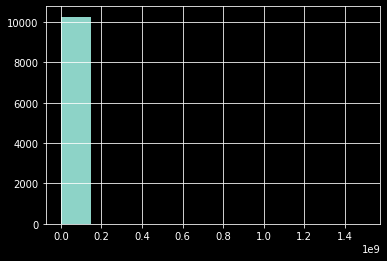

In [ ]:
X_train['salary'].hist()

In [ ]:
X_train_nona_noout = X_train_nona[X_train_nona['salary'] <= X_train_nona['salary'].quantile(0.99)].copy()

In [ ]:
y_train_nona_noout = y_train_nona[y_train_nona.index.isin(X_train_nona_noout.index)].copy()

In [ ]:
ohe = OneHotEncoder(drop='first')

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_num_manual = pd.DataFrame(scaler.fit_transform(X_train_nona_noout[num_attribs]))

In [ ]:
X_train_cat_manual = pd.DataFrame(ohe.fit_transform(X_train_nona_noout[cat_attribs]).toarray())

In [ ]:
X_train_manual_prep = pd.concat([X_train_num_manual,X_train_cat_manual],axis=1)

In [ ]:
X_train_manual_prep.shape

(9767, 91)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
scores = cross_val_score(log_reg, X_train_manual_prep, y_train_nona_noout['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5)

In [ ]:
scores

array([0.50517909, 0.49989161, 0.50317604, 0.50918973, 0.49930868])

In [ ]:
log_reg = LogisticRegression()

In [ ]:
scores = cross_val_score(log_reg, X_train_num_manual, y_train_nona_noout['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5)

In [ ]:
scores

array([0.49964838, 0.5       , 0.5       , 0.5       , 0.5       ])

In [ ]:
cb = CatBoostClassifier(iterations=100,verbose=0)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(log_reg, X_train_nona_noout[num_attribs], y_train_nona_noout['fpd5_flg'].values,
                         scoring='roc_auc', cv=cv)

In [ ]:
scores

array([0.5441531 , 0.5175888 , 0.53649155, 0.57066453, 0.55315768,
       0.57112454, 0.56430898, 0.54325691, 0.56890906, 0.57449513,
       0.55865402, 0.57191766, 0.54230513, 0.54214386, 0.52213604,
       0.55486554, 0.56955152, 0.60805888, 0.56029775, 0.56749463,
       0.60827438, 0.57263676, 0.57103465, 0.59152893, 0.56751584,
       0.57070154, 0.5590215 , 0.52585513, 0.52763846, 0.54957673])

In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
scores = cross_val_score(log_reg, X_train_manual_prep, y_train_nona_noout['fpd5_flg'].values,
                         scoring='roc_auc', cv=cv)

In [ ]:
scores

array([0.64420545, 0.62012098, 0.57826528, 0.61101594, 0.60517856,
       0.64755771, 0.61200998, 0.63512655, 0.62876098, 0.63978983,
       0.60729355, 0.66577837, 0.58483233, 0.59810655, 0.61712826,
       0.61231666, 0.67026744, 0.65277984, 0.622132  , 0.60581695,
       0.65636666, 0.62125514, 0.65553123, 0.61684538, 0.60523143,
       0.63683999, 0.63030995, 0.59366727, 0.6144203 , 0.60154977])

In [ ]:
scores.mean()

0.6230166775287878

In [ ]:
scores = cross_val_score(log_reg, X_train_prep, y_train['fpd5_flg'].values,
                         scoring='roc_auc', cv=cv)

In [ ]:
scores.mean()

0.62494116888101

In [ ]:
log_reg = LogisticRegression(max_iter=10000,class_weight='balanced')

In [ ]:
scores = cross_val_score(log_reg, X_train_prep, y_train['fpd5_flg'].values,
                         scoring='roc_auc', cv=cv)

In [ ]:
scores.mean()

0.6250738145655755

1. Target encoding in pipeline
2. regroup categorical features
3. In order to debug pipeline fit logistic regression on original data (prepared manualy)
4. cross val with two metrics

# Cross validation with two metrics

In [ ]:
X_train_prep = pd.DataFrame(full_pipeline.fit_transform(X_train).toarray())

In [ ]:
cat_features_names = list(full_pipeline.transformers_[1][1].get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_prep.columns = most_freq_num_features+median_num_features + \
            ['salary_over_age'] + cat_features_names

In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
tree_reg = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scoring = {'roc_auc': 'roc_auc',
           'average_precision': 'average_precision'}

In [ ]:
scores = cross_validate(log_reg, X_train_prep, y_train['fpd5_flg'].values, scoring=scoring,
                         cv=cv, return_train_score=True)

In [ ]:
scores['test_average_precision'].mean()

0.36795643916354576

In [ ]:
scores['test_roc_auc'].mean()

0.62494116888101

In [ ]:
scores['test_average_precision'].mean()

0.36795643916354576

In [ ]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')

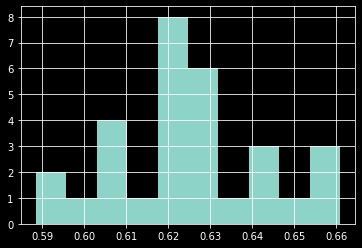

In [ ]:
pd.Series(scores['test_roc_auc']).hist()

In [ ]:
scores = cross_validate(tree_reg, X_train_prep, y_train['fpd5_flg'].values, scoring=scoring,
                         cv=cv, return_train_score=True)

In [ ]:
scores['test_average_precision'].mean()

0.2813511831500889

In [ ]:
scores['test_roc_auc'].mean()

0.5206769245058787

# Target encoding

In [ ]:
df['type_of_document'].value_counts()

UMID                 5419
Driver license ID    3073
TIN                  3057
Passport             1867
SSS                  1498
PRC                   449
Name: type_of_document, dtype: int64

In [ ]:
cat_dict = df.groupby('type_of_document')['fpd5_flg'].mean().to_dict()

In [ ]:
cat_dict

{'Driver license ID': 0.27790432801822323,
 'PRC': 0.1870824053452116,
 'Passport': 0.2747723620782003,
 'SSS': 0.24299065420560748,
 'TIN': 0.3071638861629048,
 'UMID': 0.26517807713600294}

In [ ]:
df['type_of_document'].map(cat_dict)

0        0.265178
1        0.265178
2        0.242991
3        0.307164
4        0.265178
           ...   
15358    0.265178
15359    0.274772
15360    0.265178
15361    0.265178
15362    0.242991
Name: type_of_document, Length: 15363, dtype: float64

In [ ]:
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self.features_dict = {}
        self.mean_pd = None
    def fit(self, X, y=None):

        df = X.copy()
        df = df.fillna('na')
        cols = df.columns
        df['fpd5_flg'] = y
        self.mean_pd = df['fpd5_flg'].mean()

        for col in cols:
          self.features_dict[col] = df.groupby(col)['fpd5_flg'].mean().to_dict()

        return self

    def transform(self, X):
        X = X.fillna('na')
        for col, d in self.features_dict.items():
          X[col] = X[col].map(d)

        return X.fillna(self.mean_pd)

## todo atribute adder with target encoding

In [ ]:
te = TargetEncoder()

In [ ]:
te.fit(X_train[cat_attribs],y_train)

TargetEncoder()

In [ ]:
te.transform(X_train[cat_attribs]).isna().mean()

type_of_document          0.0
email_domain_formatted    0.0
social_status             0.0
disbursment_type          0.0
os                        0.0
dtype: float64

In [ ]:
te.transform(X_test[cat_attribs]).isna().mean()

type_of_document          0.0
email_domain_formatted    0.0
social_status             0.0
disbursment_type          0.0
os                        0.0
dtype: float64

In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", TargetEncoder(), cat_attribs),
    ])

In [ ]:
model_pipe = Pipeline([
    ('preprocessing', full_pipeline),
    ('model', log_reg)]
)

In [ ]:
model_pipe.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(transformers=[('most_freq',
                                                                                                    Pipeline(steps=[('imputer',
                                                                                                                     SimpleImputer(strategy='most_frequent'))]),
                                                                                                    ['gender',
                                                                                                     'device_quaility_index',
                                                                                                     'behavioral_index',
                                                                       

In [ ]:
model_pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
scores = cross_validate(model_pipe, X_train, y_train['fpd5_flg'].values, 
                        scoring=scoring,
                         cv=cv, return_train_score=True)

In [ ]:
scores

{'fit_time': array([0.27454948, 0.22841263, 0.1743598 , 0.19128847, 0.19730973,
        0.2175653 , 0.16575861, 0.18616247, 0.18782783, 0.2165792 ,
        0.21004081, 0.17765784, 0.25563025, 0.1877625 , 0.1884737 ,
        0.19584417, 0.22311854, 0.19163179, 0.2362442 , 0.1700964 ,
        0.18346357, 0.16553187, 0.17283368, 0.17721128, 0.23617887,
        0.18046308, 0.21087432, 0.18800426, 0.20096922, 0.18642139]),
 'score_time': array([0.02818084, 0.03146243, 0.02619624, 0.0272429 , 0.02517271,
        0.02482343, 0.02514839, 0.02586699, 0.0257256 , 0.02785254,
        0.02985477, 0.02736306, 0.0272243 , 0.02865505, 0.03084874,
        0.0251143 , 0.02647781, 0.03136039, 0.02600741, 0.02607799,
        0.02664804, 0.02857137, 0.0277102 , 0.02771211, 0.02697158,
        0.02584291, 0.02493906, 0.02602339, 0.02506542, 0.02986002]),
 'test_average_precision': array([0.33313164, 0.360215  , 0.36629928, 0.40055284, 0.39817389,
        0.35987185, 0.35668131, 0.36181554, 0.36533368, 0.36

In [ ]:
scores['test_roc_auc'].mean()

0.6251414790060298

In [ ]:
scores['test_average_precision'].mean()

0.36735960010569324

In [ ]:
scores['test_roc_auc'].mean()

0.6251414790060298

In [ ]:
scores['test_average_precision'].mean()

0.36735960010569324

# Target encoding + ohe

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat_te", TargetEncoder(), cat_attribs),
        ("cat_ohe", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

In [ ]:
model_pipe = Pipeline([
    ('preprocessing', full_pipeline),
    ('model', log_reg)]
)

In [ ]:
scores = cross_validate(model_pipe, X_train, y_train['fpd5_flg'].values, 
                        scoring=scoring,
                         cv=cv, return_train_score=True)

In [ ]:
scores['test_roc_auc'].mean()

0.6251489076614877

In [ ]:
scores['test_average_precision'].mean()

0.3677830487038905

# Grid search

In [ ]:
log_reg = LogisticRegression()

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat_te", TargetEncoder(), cat_attribs),
    ])

In [ ]:
model_pipe = Pipeline([
    ('preprocessing', full_pipeline),
    ('model', log_reg)]
)

In [ ]:
scores = cross_validate(model_pipe, X_train, y_train['fpd5_flg'].values, 
                        scoring=scoring,
                        cv=5, return_train_score=True)

In [ ]:
scores['test_roc_auc'].mean()

0.6244114975592275

In [ ]:
 param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'model__penalty': ['none', 'l1']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
clf = GridSearchCV(model_pipe, param_grid,cv=5,scoring='roc_auc',n_jobs=-1)

In [ ]:
clf.fit(X_train, y_train['fpd5_flg'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          ColumnTransformer(transformers=[('most_freq',
                                                                                                                           Pipeline(steps=[('imputer',
                                                                                                                                            SimpleImputer(strategy='most_frequent'))]),
                                                                                                                           ['gender',
                                                                                                                            'device_quaili

In [ ]:
clf.best_params_

{'model__C': 1, 'model__penalty': 'l2'}